# Helper functions

In [1]:
# Import
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import re
import sys
from pathlib import Path

# Add SynFlow to path in order to import modules
repo_root = "/home/volt/bach/SynFlow"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
from SynFlow.SCD import print_jsd_by_period, plot_jsd_by_period, plot_items_jsd_by_period

# Analysis

In [2]:
# RSC
target_lemma = 'air'
target_pos = 'N'
keyword_string = f'{target_lemma}\t{target_pos}' # Or you can use the full POS for precision (e.g., {target_lemma}\tNOUN)
period = '1750-1819'
corpus_path = '/home/volt/bach/pilot_data/RSC/1750-1819_che_half_decades'
fname_pattern = re.compile(
    r'Royal_Society_Corpus_open_v6\.0_text_(?P<id>\d+)_(?P<year>\d+)\.txt$'
)

In [3]:
output_folder = Path(f'/home/volt/bach/SynFlow/case_studies/RSC_air_water_acid/')
input_SCD = output_folder / 'input' / 'SCD' /f'{target_lemma}-{target_pos}-{period}'
os.makedirs(input_SCD, exist_ok=True)

### Air

In [4]:
fname_df_pattern = re.compile(
    rf'air/Royal_Society_Corpus_open_v6\.0_text_'   # fixed prefix
    rf'(?P<id>\d+)_'                            # capture numeric ID
    rf'(?P<year>\d+)'                           # capture year
    rf'.txt/\d+$'             #  and extension and line number
)

all_sfillers_df_path = '/home/volt/bach/SynFlow/case_studies/RSC_air_water_acid/output/air-N-1750-1819/Explorer/air_samples_sfillerdf_all.csv'

#### Preprocessing

This step is unique to the type of data we're working with.

##### chi_amod

In [5]:
air_chiamod_df_path = f'{input_SCD}/air_chiamod_1750-1819.csv'
interest_slot = 'chi_amod'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_chiamod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_chiamod_df_path)

In [6]:
# Replace the slot-fillers for specific slot

from SynFlow.Explorer import replace_in_sfiller_df_column

replacements = {
    "dephlogisticate/V": "dephlogisticated/A",
    "phlogisticate/V": "phlogisticated/A",
    'plllogisticate/V': 'phlogisticated/A',
    'deplllogisticate/V': 'dephlogisticated/A',
    'gisticate/V': 'phlogisticated/A',
    'Open/A': 'open/A',
    'atmospheric/A': 'atmospherical/A',
    'fix/V': 'fixed/A',
}
replace_in_sfiller_df_column(air_chiamod_df_path,
                             'chi_amod',
                             replacements=replacements,
                             output_path = air_chiamod_df_path)


In [7]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_chiamod_df_path, 'chi_amod', 5)

,id,subfolder,target,chi_amod
0,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],open/A
1,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],cold/A
2,air/Royal_Society_Corpus_open_v6.0_text_105145...,1750,['air/N'],open/A
3,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],open/A
4,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],open/A
...,...,...,...,...
6767,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],surround/V
6768,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],circumambient/A
6769,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],open/A
6770,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],surround/V


##### pa_obl

In [8]:
air_paobl_df_path = f'{input_SCD}/air_paobl_1750-1819.csv'
interest_slot = 'pa_obl'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_paobl_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_paobl_df_path)

In [9]:
# Remove all adjective from the slot-filler column
import pandas as pd
# load dataframe
air_paobl_df = pd.read_csv(air_paobl_df_path)

# keep rows where pa_obl does not end with /A
air_paobl_df = air_paobl_df[~air_paobl_df["pa_obl"].str.endswith("/A']")]

# save if needed
air_paobl_df.to_csv(air_paobl_df_path, index=False)


In [10]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_paobl_df_path, 'pa_obl', 5)

,id,subfolder,target,pa_obl
0,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],expose/V
1,air/Royal_Society_Corpus_open_v6.0_text_105139...,1750,['air/N'],hang/V
2,air/Royal_Society_Corpus_open_v6.0_text_105166...,1750,['air/N'],communicate/V
3,air/Royal_Society_Corpus_open_v6.0_text_105108...,1750,['air/N'],rise/V
4,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],make/V
...,...,...,...,...
1824,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],cool/V
1825,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],hold/V
1826,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],cool/V
1827,air/Royal_Society_Corpus_open_v6.0_text_107516...,1815,['air/N'],cool/V


##### pa_nmod

In [11]:
air_panmod_df_path = f'{input_SCD}/air_panmod_1750-1819.csv'
interest_slot = 'pa_nmod'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
air_panmod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=air_panmod_df_path)

In [12]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(air_panmod_df_path, 'pa_nmod', 5)

,id,subfolder,target,pa_nmod
0,air/Royal_Society_Corpus_open_v6.0_text_105219...,1750,['air/N'],moisture/N
1,air/Royal_Society_Corpus_open_v6.0_text_105166...,1750,['air/N'],electricity/N
2,air/Royal_Society_Corpus_open_v6.0_text_105167...,1750,['air/N'],quantity/N
3,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],resistance/N
4,air/Royal_Society_Corpus_open_v6.0_text_105074...,1750,['air/N'],particle/N
...,...,...,...,...
4643,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],part/N
4644,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],quantity/N
4645,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],quantity/N
4646,air/Royal_Society_Corpus_open_v6.0_text_107517...,1815,['air/N'],stream/N


#### Frequency Changes

In [13]:
from SynFlow.SCD.freq import plot_freq_top_union_sfillers_by_period
slot_type = 'pa_nmod'
slot_df_path = air_panmod_df_path

In [14]:
# Bar chart (absolute freq)
plot_freq_top_union_sfillers_by_period(slot_df_path, 
                              slot_type=slot_type,
                              top_n=10,
                              normalized=True, # Normalised or Raw count
                              time_col='subfolder',
                              )

#### Slot Filler JSD

In [15]:
from SynFlow.SCD.jsd import sfillers_jsd_by_period

In [16]:
sfillers_js_df = pd.read_csv(slot_df_path)
sfillers_js_results = sfillers_jsd_by_period(sfillers_js_df, word_col=slot_type, period_col='subfolder', top_n=6)
print_jsd_by_period(sfillers_js_results)


=== Shift to period 1755 ===
Jensen-Shannon Divergence: 0.5458
Top shifted items:
  de_electricity/N: 0.0873
  in_shower/N: 0.0588
  in_weight/N: 0.0412
  de_expansion/N: 0.0256
  de_exposure/N: 0.0256
  de_surface/N: 0.0256

=== Shift to period 1760 ===
Jensen-Shannon Divergence: 0.6966
Top shifted items:
  in_moisture/N: 0.0769
  de_shower/N: 0.0588
  de_weight/N: 0.0412
  de_pressure/N: 0.0353
  de_column/N: 0.0353
  in_electricity/N: 0.0298

=== Shift to period 1765 ===
Jensen-Shannon Divergence: 0.7131
Top shifted items:
  de_electricity/N: 0.0513
  de_temperature/N: 0.0513
  de_moisture/N: 0.0462
  in_part/N: 0.0426
  de_heat/N: 0.0425
  in_weight/N: 0.0361

=== Shift to period 1770 ===
Jensen-Shannon Divergence: 0.4263
Top shifted items:
  in_kind/N: 0.0425
  de_weight/N: 0.0361
  in_diminution/N: 0.0231
  de_sort/N: 0.0164
  de_particle/N: 0.0152
  de_density/N: 0.0131

=== Shift to period 1775 ===
Jensen-Shannon Divergence: 0.3290
Top shifted items:
  in_expansion/N: 0.0283
 

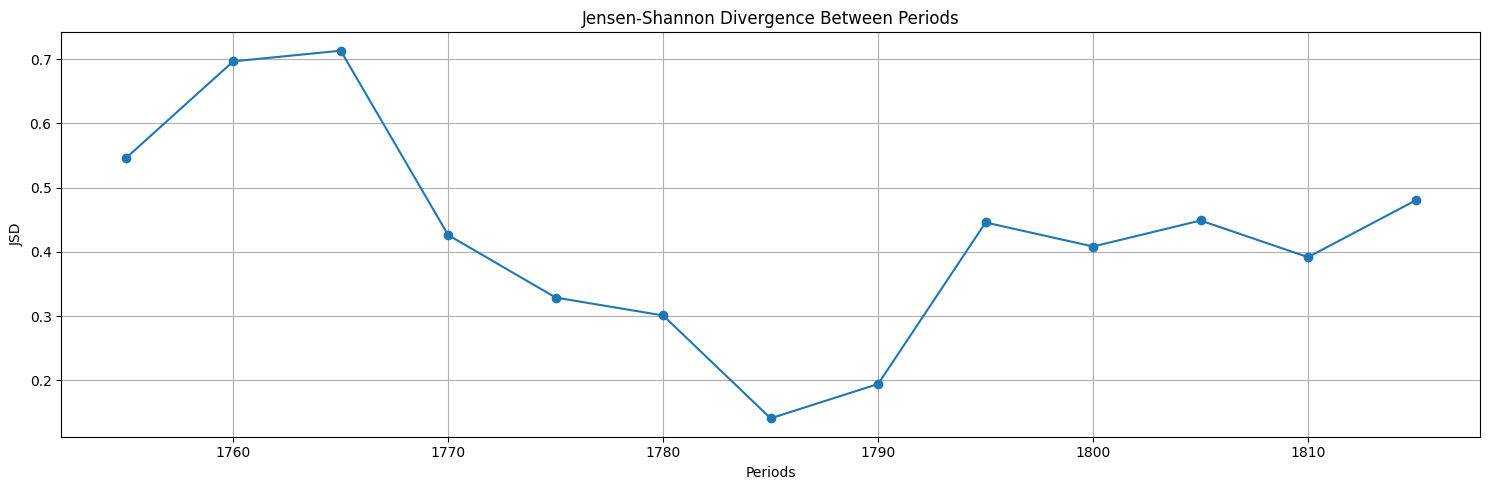

In [17]:
plot_jsd_by_period(sfillers_js_results)

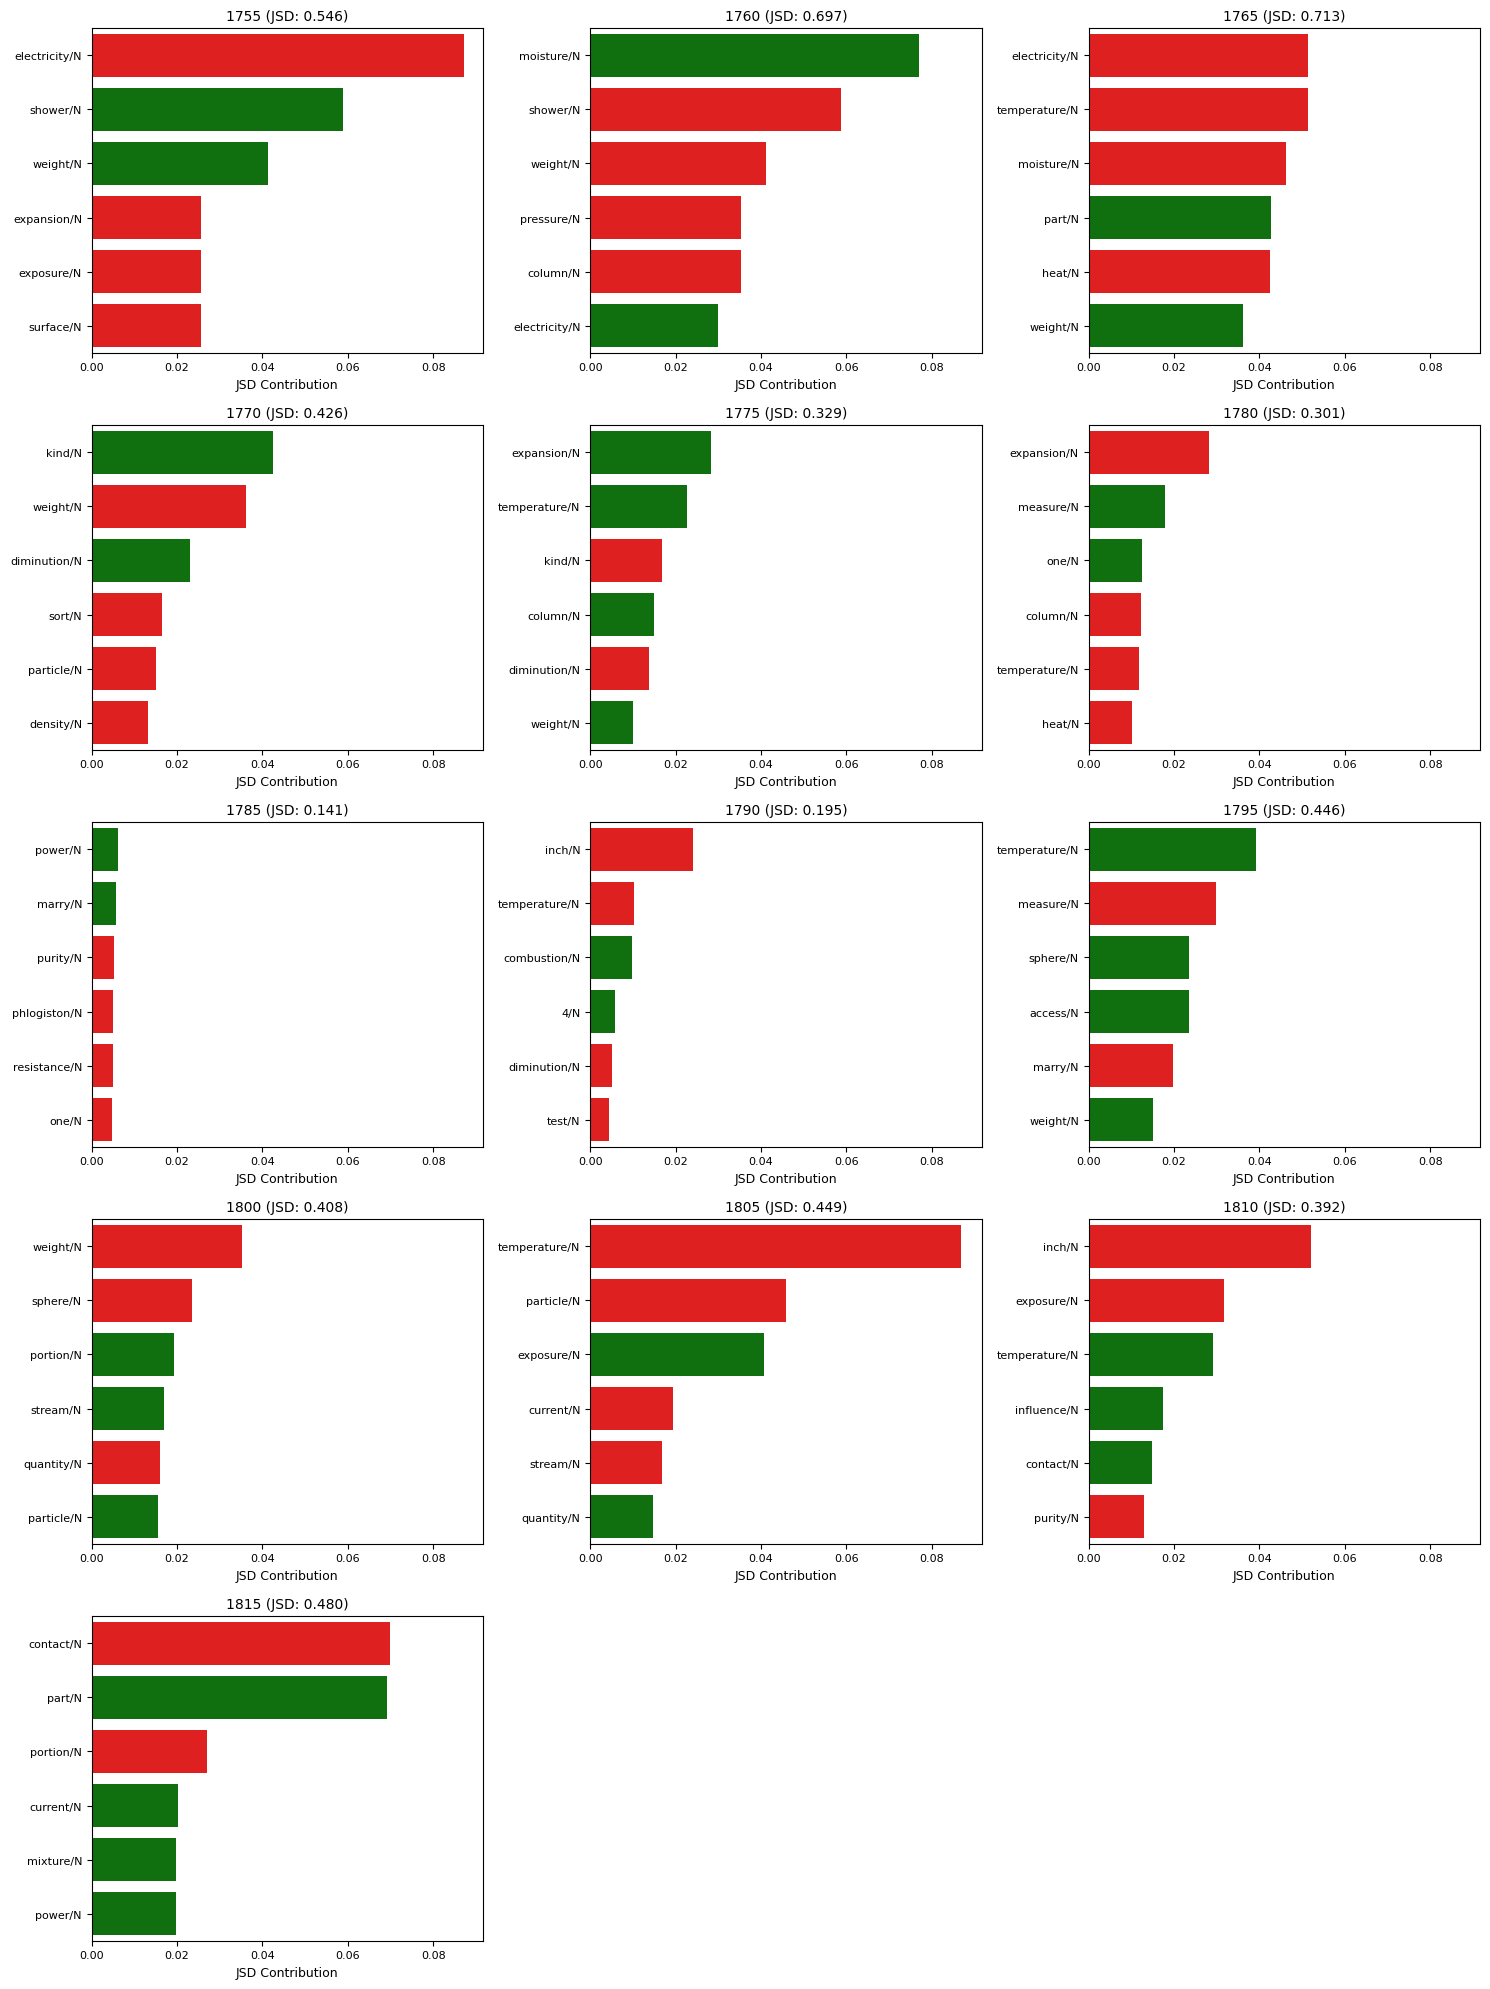

In [18]:
plot_items_jsd_by_period(sfillers_js_results, top_n=6, cols=3)